# Image Classification

Based on https://www.tensorflow.org/tutorials/images/classification

In [234]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import cv2 as cv
import PIL
import pathlib
import matplotlib.pyplot as plt
import os
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.debugging.set_log_device_placement(True)

In [235]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
  os.getcwd() + '/data/train_class',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  os.getcwd() + '/data/train_class',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 37553 files belonging to 8 classes.
Using 30043 files for training.


2022-12-13 13:47:44.478205: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-13 13:47:44.479033: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-13 13:47:44.479165: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-13 13:47:44.479258: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least on

Found 37553 files belonging to 8 classes.
Using 7510 files for validation.


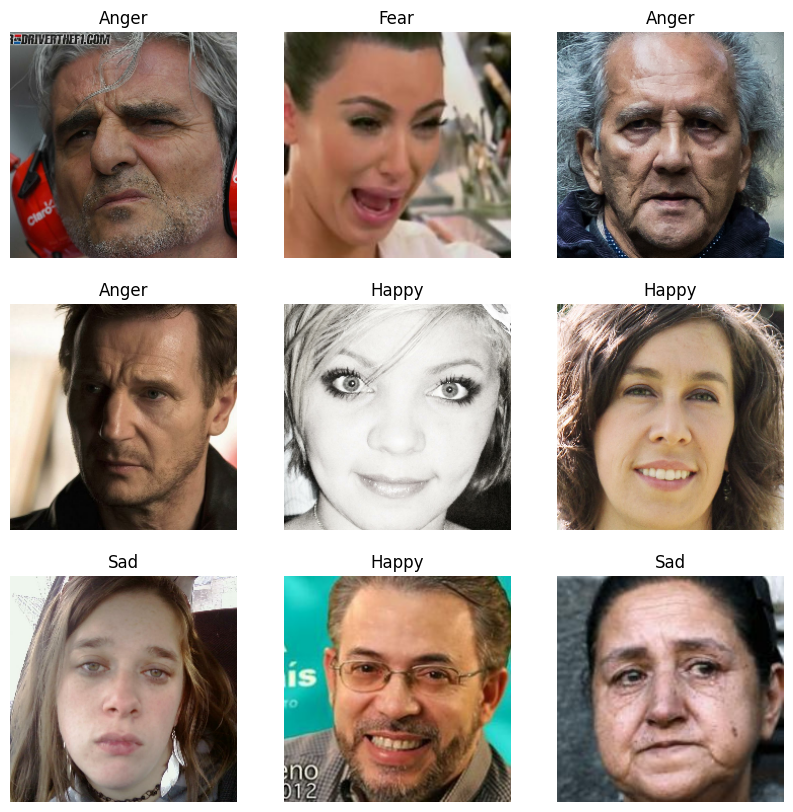

In [5]:
class_names = ['Neutral', 'Happy', 'Sad', 'Surprise', 'Fear', 'Disgust', 'Anger', 'Contempt']

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


2022-12-13 13:48:08.806281: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 748 of 1000


0.00197077 0.8423887


2022-12-13 13:48:11.490138: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


In [11]:
num_classes = len(class_names)


In [33]:

model = keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [36]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


2022-12-13 11:38:58.215440: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


939/939 [==============================] - ETA: 0s - loss: 1.9600 - accuracy: 0.2367

2022-12-13 11:40:04.518346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


939/939 [==============================] - 74s 75ms/step - loss: 1.9600 - accuracy: 0.2367 - val_loss: 1.8040 - val_accuracy: 0.3218
Epoch 2/10
939/939 [==============================] - 91s 97ms/step - loss: 1.7016 - accuracy: 0.3657 - val_loss: 1.7166 - val_accuracy: 0.3537
Epoch 3/10
939/939 [==============================] - 91s 97ms/step - loss: 1.5377 - accuracy: 0.4304 - val_loss: 1.6752 - val_accuracy: 0.3750
Epoch 4/10
939/939 [==============================] - 87s 93ms/step - loss: 1.3198 - accuracy: 0.5177 - val_loss: 1.7595 - val_accuracy: 0.3740
Epoch 5/10
939/939 [==============================] - 85s 91ms/step - loss: 1.0431 - accuracy: 0.6246 - val_loss: 2.0400 - val_accuracy: 0.3738
Epoch 6/10
939/939 [==============================] - 89s 94ms/step - loss: 0.7395 - accuracy: 0.7388 - val_loss: 2.6472 - val_accuracy: 0.3579
Epoch 7/10
939/939 [==============================] - 88s 94ms/step - loss: 0.4976 - accuracy: 0.8289 - val_loss: 3.0329 - val_accuracy: 0.3615
Epo

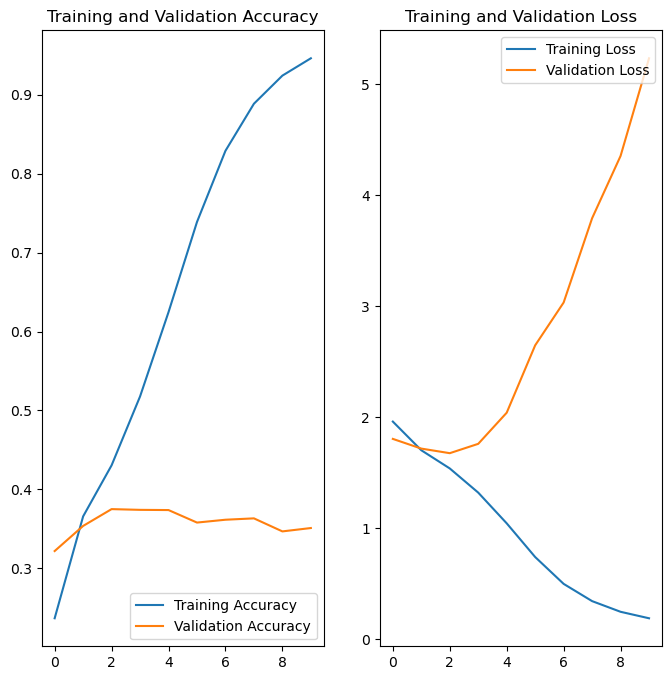

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [47]:
np.max(history.history['accuracy'])

0.9461771845817566

In [48]:
np.max(history.history['val_accuracy'])

0.37496668100357056

In [38]:
model.save('./bischof_affectnet_cnn_v1.h5')

## Data augmentation + Dropout

In [8]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

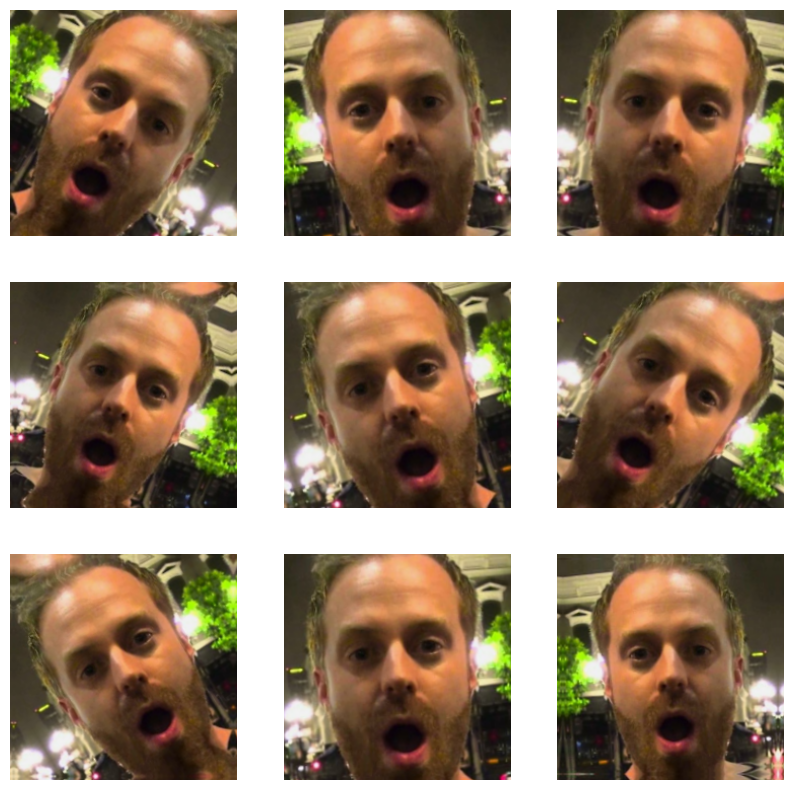

In [9]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [12]:
dropout_model = keras.Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [13]:
dropout_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
dropout_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                  

In [15]:
epochs = 20
dropout_history = dropout_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


2022-12-13 13:49:22.491827: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2022-12-13 13:49:23.249605: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2022-12-13 13:49:24.791965: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fe02cded230 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-12-13 13:49:24.791987: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1660, Compute Capability 7.5
2022-12-13 13:49:24.819350: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2022-12-13 13:49:25.004380: I tensorflow/compiler/jit/xla_compilation_cache.cc:

939/939 [==============================] - 88s 88ms/step - loss: 2.0599 - accuracy: 0.1609 - val_loss: 1.9956 - val_accuracy: 0.2000
Epoch 2/20
939/939 [==============================] - 82s 87ms/step - loss: 1.9795 - accuracy: 0.2287 - val_loss: 1.9219 - val_accuracy: 0.2628
Epoch 3/20
939/939 [==============================] - 83s 88ms/step - loss: 1.8873 - accuracy: 0.2768 - val_loss: 1.7988 - val_accuracy: 0.3130
Epoch 4/20
939/939 [==============================] - 82s 87ms/step - loss: 1.7994 - accuracy: 0.3143 - val_loss: 1.7463 - val_accuracy: 0.3409
Epoch 5/20
939/939 [==============================] - 82s 88ms/step - loss: 1.7404 - accuracy: 0.3387 - val_loss: 1.7212 - val_accuracy: 0.3467
Epoch 6/20
939/939 [==============================] - 83s 88ms/step - loss: 1.7024 - accuracy: 0.3524 - val_loss: 1.6642 - val_accuracy: 0.3646
Epoch 7/20
939/939 [==============================] - 83s 88ms/step - loss: 1.6675 - accuracy: 0.3671 - val_loss: 1.6357 - val_accuracy: 0.3804
Epo

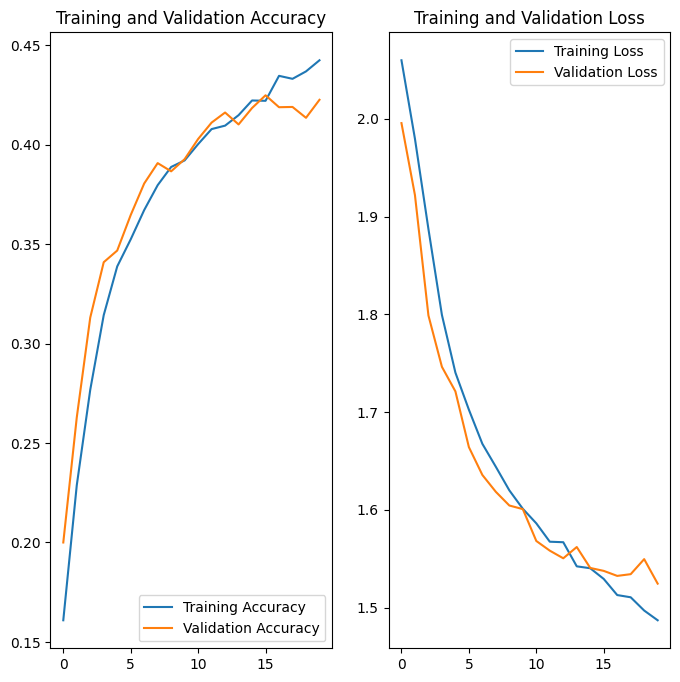

In [16]:
acc = dropout_history.history['accuracy']
val_acc = dropout_history.history['val_accuracy']

loss = dropout_history.history['loss']
val_loss = dropout_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [18]:
np.max(dropout_history.history['accuracy'])

0.44236594438552856

In [19]:
np.max(dropout_history.history['val_accuracy'])

0.42476698756217957

In [20]:
dropout_model.save('./bischof_affectnet_cnn_v2.h5')

## Reducing Classes to 4

In [237]:
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
  os.getcwd() + '/data-4classes/train_class',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  os.getcwd() + '/data-4classes/train_class',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 18803 files belonging to 4 classes.
Using 15043 files for training.
Found 18803 files belonging to 4 classes.
Using 3760 files for validation.


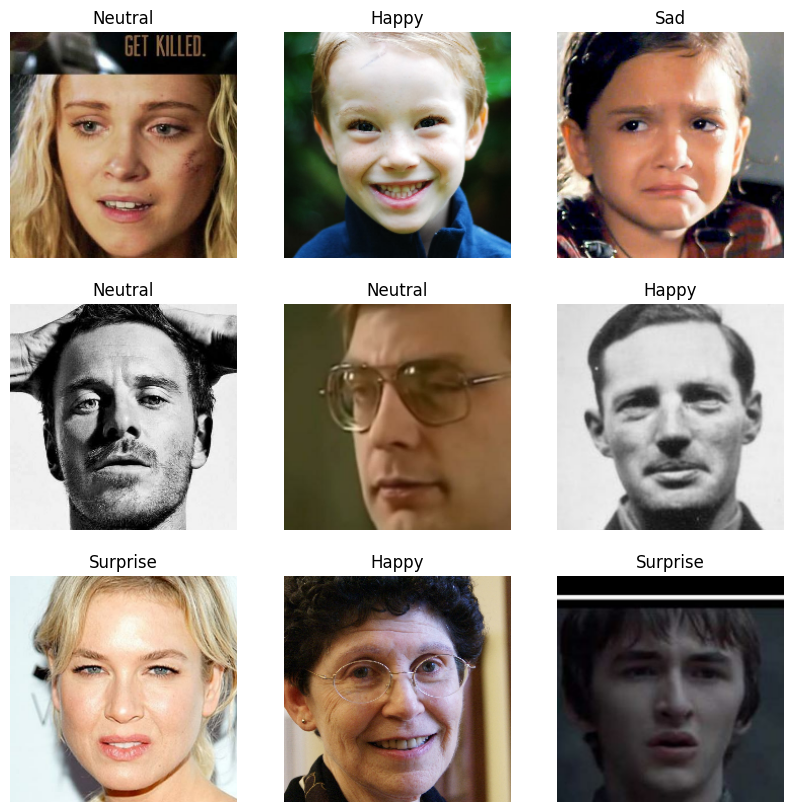

In [238]:
class_names = ['Neutral', 'Happy', 'Sad', 'Surprise', 'Fear', 'Disgust', 'Anger', 'Contempt']

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [239]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [240]:
num_classes = len(class_names)


In [241]:
model = keras.Sequential([
  keras.Sequential(
    [
        layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
  ),
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [242]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_29 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 rescaling_15 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 conv2d_45 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                

In [243]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
471/471 [==============================] - 44s 75ms/step - loss: 1.4082 - accuracy: 0.3004 - val_loss: 1.3443 - val_accuracy: 0.3862
Epoch 2/10
471/471 [==============================] - 34s 71ms/step - loss: 1.2917 - accuracy: 0.4060 - val_loss: 1.2226 - val_accuracy: 0.4604
Epoch 3/10
471/471 [==============================] - 34s 72ms/step - loss: 1.2157 - accuracy: 0.4553 - val_loss: 1.2202 - val_accuracy: 0.4585
Epoch 4/10
471/471 [==============================] - 35s 74ms/step - loss: 1.1762 - accuracy: 0.4732 - val_loss: 1.1565 - val_accuracy: 0.4806
Epoch 5/10
471/471 [==============================] - 36s 77ms/step - loss: 1.1418 - accuracy: 0.4935 - val_loss: 1.1170 - val_accuracy: 0.5035
Epoch 6/10
471/471 [==============================] - 35s 75ms/step - loss: 1.1108 - accuracy: 0.5140 - val_loss: 1.0794 - val_accuracy: 0.5282
Epoch 7/10
471/471 [==============================] - 35s 74ms/step - loss: 1.0868 - accuracy: 0.5275 - val_loss: 1.1117 - val_accuracy:

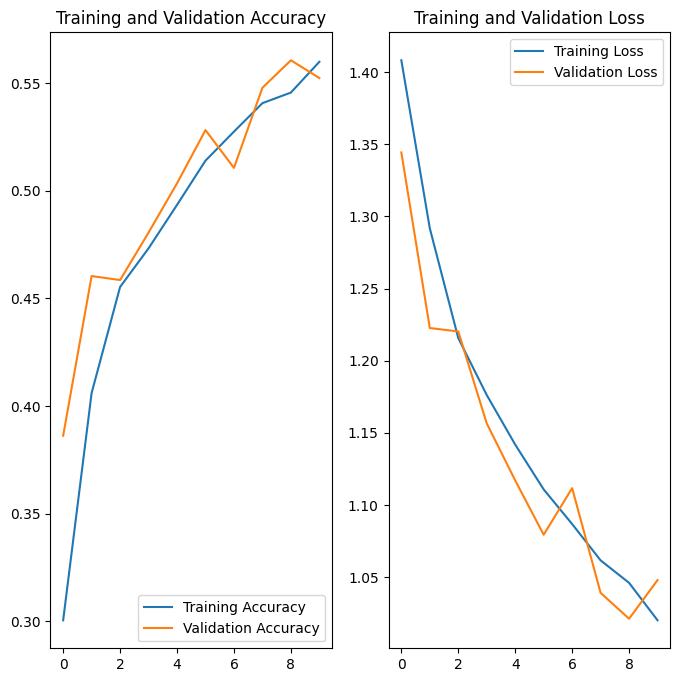

In [249]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('xx')

## Add more data

In [3]:
import os
import glob
import numpy as np

pwd = os.getcwd()
dataset = f"{pwd}/affectnet/train_set"
annotations_dir = dataset + "/annotations"

classes = ["0", "1", "2", "3", "4", "5", "6", "7"]

expressions = glob.glob(f"{annotations_dir}/*_exp.npy", recursive=False)
classified_images = {key: list() for key in classes}

for (i, image_expression_filename) in enumerate(expressions):
    # if i % 100 == 0:
        # print percentage of expression progress
        # print('Progress: {:.2f}'.format(i / len(expressions) * 100))

    # load from numpy file
    image_expression = np.load(image_expression_filename)
    # get first value (there is only one in this case)
    image_expression_val = image_expression.flat[0]
    # if it's not one of the defined discrete expressions abort here
    if int(image_expression_val) > 7:
        continue

    classified_images[image_expression_val].append(image_expression_filename)

In [31]:
from keras.utils import to_categorical

filenames = []
labels = []

for class_key in classified_images.keys():
    for expression_image_file in classified_images[class_key]:
        image_filename = expression_image_file[:-8] + ".jpg"
        image_filename = image_filename.replace("/annotations/", "/images/")
        filenames.append(image_filename)
        labels.append(class_key)

# saving the filename array as .npy file
np.save('filenames.npy', filenames)

# One hot vector representation of labels
y_labels_one_hot = to_categorical(labels)

# saving the y_labels_one_hot array as a .npy file
np.save('y_labels.npy', labels)
np.save('y_labels_one_hot.npy', y_labels_one_hot)

In [10]:
from sklearn.utils import shuffle

filenames = np.load('filenames.npy')
y_labels_one_hot = np.load('y_labels_one_hot.npy')

filenames_shuffled, y_labels_one_hot_shuffled = shuffle(filenames, y_labels_one_hot)

# saving the shuffled file.
# you can load them later using np.load().
np.save('y_labels_one_hot_shuffled.npy', y_labels_one_hot_shuffled)
np.save('filenames_shuffled.npy', filenames_shuffled)


In [11]:
from sklearn.model_selection import train_test_split

# Used this line as our filename array is not a numpy array.
filenames_shuffled_numpy = np.array(filenames_shuffled)

X_train_filenames, X_val_filenames, y_train, y_val = train_test_split(
    filenames_shuffled_numpy, y_labels_one_hot_shuffled, test_size=0.2, random_state=1)

print(X_train_filenames.shape) # (3800,)
print(y_train.shape)           # (3800, 12)

print(X_val_filenames.shape)   # (950,)
print(y_val.shape)             # (950, 12)

# You can save these files as well. As you will be using them later for training and validation of your model.
np.save('X_train_filenames.npy', X_train_filenames)
np.save('y_train.npy', y_train)

np.save('X_val_filenames.npy', X_val_filenames)
np.save('y_val.npy', y_val)

(230120,)
(230120, 8)
(57531,)
(57531, 8)


In [83]:
from skimage.io import imread
from skimage.transform import resize

batch_size = 32
img_height = 224
img_width = 224

class My_Custom_Generator(keras.utils.Sequence) :
  
  def __init__(self, image_filenames, labels, batch_size) :
    self.image_filenames = image_filenames
    self.labels = labels
    self.batch_size = batch_size
    
    
  def __len__(self) :
    return (np.ceil(len(self.image_filenames) / float(self.batch_size))).astype(np.int)
  
  
  def __getitem__(self, idx) :
    batch_x = self.image_filenames[idx * self.batch_size : (idx+1) * self.batch_size]
    batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]
    
    return np.array([
            resize(imread(str(file_name)), (img_height, img_width, 3))
               for file_name in batch_x]), np.array(batch_y)


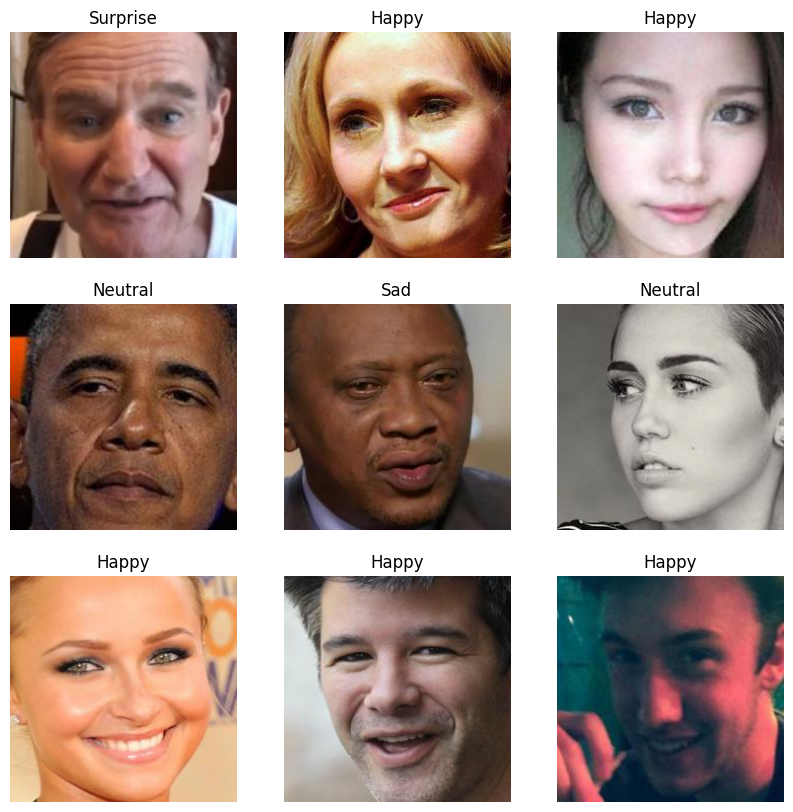

In [82]:
class_names = ['Neutral', 'Happy', 'Sad', 'Surprise', 'Fear', 'Disgust', 'Anger', 'Contempt']

test_batch_generator = My_Custom_Generator(X_train_filenames, y_train, 9)

plt.figure(figsize=(10, 10))

for i in range(9):
  x, y = test_batch_generator.__getitem__(i)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(x[i])
  plt.title(class_names[np.argmax(y[i], axis=None, out=None)])
  plt.axis("off")

In [126]:
batch_size = 32

my_training_batch_generator = My_Custom_Generator(X_train_filenames, y_train, batch_size)
my_validation_batch_generator = My_Custom_Generator(X_val_filenames, y_val, batch_size)

In [127]:
num_classes = len(class_names)

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

model = keras.Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [128]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_15 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 rescaling_8 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                

In [129]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_loss` score has improved.
        # The saved model name will include the current epoch.
        filepath="bischof_affectnet_cnn_v3_{epoch}",
        save_best_only=True,  # Only save a model if `val_loss` has improved.
        monitor="val_loss",
        verbose=1,
    )
]


In [130]:
history = model.fit(x=my_training_batch_generator,
                   epochs = 10,
                   verbose = 1,
                   validation_data = my_validation_batch_generator,
                   callbacks=callbacks)

/tmp/ipykernel_92696/3521351536.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.image_filenames) / float(self.batch_size))).astype(np.int)


Epoch 1/10


2022-12-13 16:18:35.556903: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_16/dropout_8/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


7192/7192 [==============================] - ETA: 0s - loss: 1.4852 - accuracy: 0.4671
Epoch 1: val_loss improved from inf to 1.48066, saving model to bischof_affectnet_cnn_v3_1


7192/7192 [==============================] - 2011s 279ms/step - loss: 1.4852 - accuracy: 0.4671 - val_loss: 1.4807 - val_accuracy: 0.4675
Epoch 2/10


/tmp/ipykernel_92696/3521351536.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.image_filenames) / float(self.batch_size))).astype(np.int)


7192/7192 [==============================] - ETA: 0s - loss: 1.4810 - accuracy: 0.4672
Epoch 2: val_loss did not improve from 1.48066
7192/7192 [==============================] - 1981s 275ms/step - loss: 1.4810 - accuracy: 0.4672 - val_loss: 1.4820 - val_accuracy: 0.4675
Epoch 3/10
7192/7192 [==============================] - ETA: 0s - loss: 1.4792 - accuracy: 0.4672
Epoch 3: val_loss improved from 1.48066 to 1.47787, saving model to bischof_affectnet_cnn_v3_3


7192/7192 [==============================] - 2002s 278ms/step - loss: 1.4792 - accuracy: 0.4672 - val_loss: 1.4779 - val_accuracy: 0.4675
Epoch 4/10


/tmp/ipykernel_92696/3521351536.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.image_filenames) / float(self.batch_size))).astype(np.int)


7192/7192 [==============================] - ETA: 0s - loss: 1.4790 - accuracy: 0.4672
Epoch 4: val_loss did not improve from 1.47787
7192/7192 [==============================] - 1967s 274ms/step - loss: 1.4790 - accuracy: 0.4672 - val_loss: 1.4791 - val_accuracy: 0.4675
Epoch 5/10
7192/7192 [==============================] - ETA: 0s - loss: 1.4790 - accuracy: 0.4672
Epoch 5: val_loss did not improve from 1.47787
7192/7192 [==============================] - 1976s 275ms/step - loss: 1.4790 - accuracy: 0.4672 - val_loss: 1.4780 - val_accuracy: 0.4675
Epoch 6/10
7192/7192 [==============================] - ETA: 0s - loss: 1.4790 - accuracy: 0.4672
Epoch 6: val_loss did not improve from 1.47787
7192/7192 [==============================] - 1970s 274ms/step - loss: 1.4790 - accuracy: 0.4672 - val_loss: 1.4779 - val_accuracy: 0.4675
Epoch 7/10
7192/7192 [==============================] - ETA: 0s - loss: 1.4789 - accuracy: 0.4672
Epoch 7: val_loss did not improve from 1.47787
7192/7192 [======

KeyboardInterrupt: 

In [ ]:
model.save('./bischof_affectnet_cnn_v3.h5')

## Reduce amount of classes

In [161]:
filenames = np.load('filenames.npy')
y_labels = np.load('y_labels.npy')

(array([ 74874., 134415.,  25459.,      0.,  14090.,   6378.,      0.,
          3803.,  24882.,   3750.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

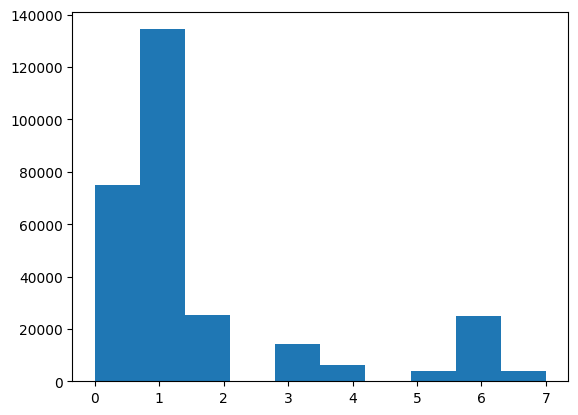

In [169]:
import matplotlib.pyplot as plt
plt.hist(y_labels)


In [ ]:
from keras.utils import to_categorical

label_filter = np.isin(y_labels, ['0','1','2','6']) # 'Neutral', 'Happy', 'Sad', 'Anger'

y_labels_nhsa = y_labels[label_filter]
y_labels_nhsa_one_hot = to_categorical(y_labels_nhsa)
filenames_nhsa = filenames[label_filter]
filenames_nhsa_shuffled, y_labels_nhsa_one_hot_shuffled = shuffle(filenames_nhsa, y_labels_nhsa_one_hot)

np.save('y_labels_nhsa_one_hot_shuffled.npy', y_labels_nhsa_one_hot_shuffled)
np.save('filenames_nhsa_shuffled.npy', filenames_nhsa_shuffled)

filenames_nhsa_shuffled_numpy = np.array(filenames_nhsa_shuffled)

X_train_filenames, X_val_filenames, y_train, y_val = train_test_split(
    filenames_nhsa_shuffled_numpy, y_labels_nhsa_one_hot_shuffled, test_size=0.2, random_state=1)

In [225]:
from keras.utils import to_categorical

label_filter = np.isin(y_labels, ['0','1','2']) # 'Neutral', 'Happy', 'Sad'

y_labels_nhs = y_labels[label_filter]
y_labels_nhs_one_hot = to_categorical(y_labels_nhs)
filenames_nhs = filenames[label_filter]
filenames_nhs_shuffled, y_labels_nhs_one_hot_shuffled = shuffle(filenames_nhs, y_labels_nhs_one_hot)

np.save('y_labels_nhs_one_hot_shuffled.npy', y_labels_nhs_one_hot_shuffled)
np.save('filenames_nhs_shuffled.npy', filenames_nhs_shuffled)

filenames_nhs_shuffled_numpy = np.array(filenames_nhs_shuffled)

X_train_filenames, X_val_filenames, y_train, y_val = train_test_split(
    filenames_nhs_shuffled_numpy, y_labels_nhs_one_hot_shuffled, test_size=0.2, random_state=1)

(array([ 74874.,      0.,      0.,      0.,      0., 134415.,      0.,
             0.,      0.,  25459.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

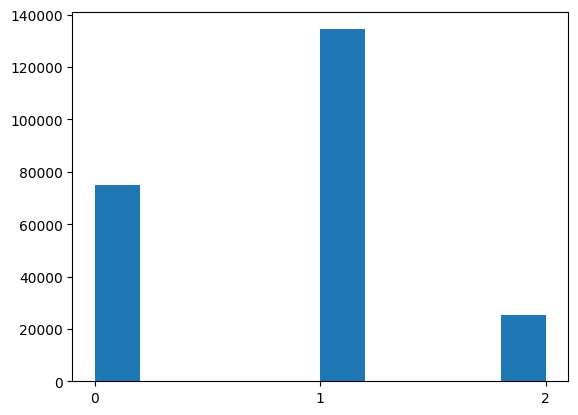

In [226]:
plt.hist(y_labels_nhs)

In [227]:
print(X_train_filenames.shape) 
print(y_train.shape)           

print(X_val_filenames.shape) 
print(y_val.shape)            

(187798,)
(187798, 3)
(46950,)
(46950, 3)


In [228]:
from skimage.io import imread
from skimage.transform import resize

batch_size = 32
img_height = 224
img_width = 224

class My_Custom_Generator(keras.utils.Sequence) :
  
  def __init__(self, image_filenames, labels, batch_size) :
    self.image_filenames = image_filenames
    self.labels = labels
    self.batch_size = batch_size
    
    
  def __len__(self) :
    return (np.ceil(len(self.image_filenames) / float(self.batch_size))).astype(np.int)
  
  
  def __getitem__(self, idx) :
    batch_x = self.image_filenames[idx * self.batch_size : (idx+1) * self.batch_size]
    batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]
    
    return np.array([
            resize(imread(str(file_name)), (img_height, img_width, 3))
               for file_name in batch_x]), np.array(batch_y)


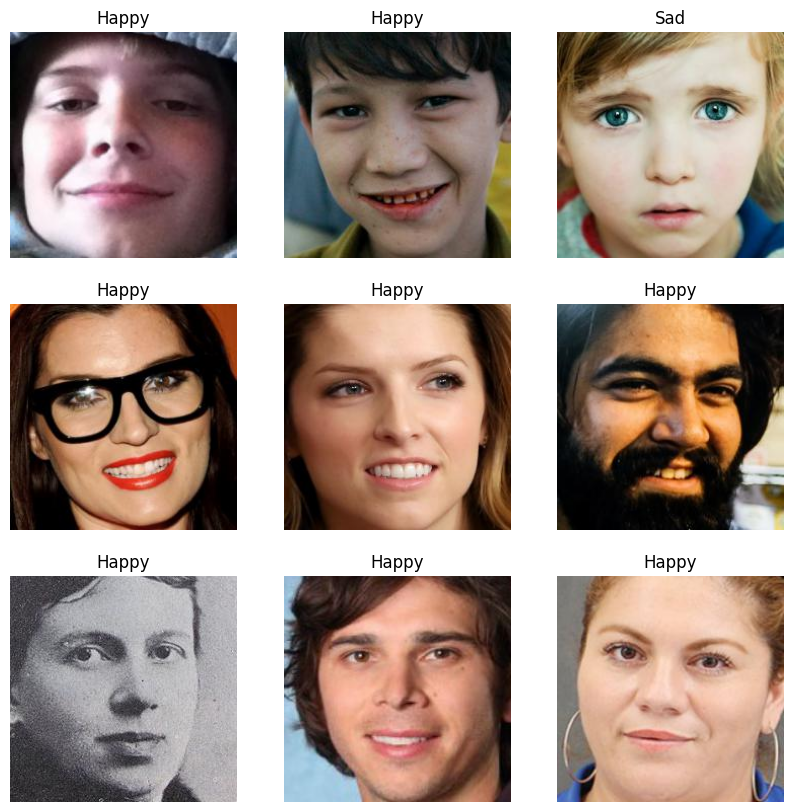

In [229]:
class_names = ['Neutral', 'Happy', 'Sad', 'Surprise', 'Fear', 'Disgust', 'Anger', 'Contempt']

test_batch_generator = My_Custom_Generator(X_train_filenames, y_train, 9)

plt.figure(figsize=(10, 10))

for i in range(9):
  x, y = test_batch_generator.__getitem__(i * 2)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(x[i])
  plt.title(class_names[np.argmax(y[i], axis=None, out=None)])
  plt.axis("off")

In [230]:
batch_size = 32

my_training_batch_generator = My_Custom_Generator(X_train_filenames, y_train, batch_size)
my_validation_batch_generator = My_Custom_Generator(X_val_filenames, y_val, batch_size)

In [231]:
num_classes = 3

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

model = keras.Sequential([
  keras.Sequential(
    [
      layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
      layers.RandomRotation(0.1),
      layers.RandomZoom(0.1),
    ]
  ),
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [232]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_loss` score has improved.
        # The saved model name will include the current epoch.
        filepath="bischof_affectnet_cnn_v4_{epoch}",
        save_best_only=True,  # Only save a model if `val_loss` has improved.
        monitor="val_loss",
        verbose=1,
    )
]


In [233]:
history = model.fit(x=my_training_batch_generator,
                   epochs = 10,
                   verbose = 1,
                   validation_data = my_validation_batch_generator,
                   callbacks=callbacks)

/tmp/ipykernel_92696/3521351536.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.image_filenames) / float(self.batch_size))).astype(np.int)


Epoch 1/10


2022-12-13 22:18:03.713424: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_28/dropout_14/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 231/5869 [>.............................] - ETA: 21:01 - loss: 0.9338 - accuracy: 0.5763

KeyboardInterrupt: 

## Predict on new data

Model:
See https://www.tensorflow.org/tutorials/images/classification

30'043 files for training (about equal amount per class)
accuracy: 0.9462 - val_accuracy: 0.3510
heavily overfitted

adding data augmentation + dropout
accuracy: 0.4424 - val_accuracy: 0.4225
less overfitted, still bad performance


230'000 files for training (unqeual distribution)